In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')



In [2]:
data = pd.read_csv('./crimes.csv', sep=';')

X = data.iloc[:, 1:].values
labels = data.iloc[:, 0].values
print("labels", labels)


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

SC = StandardScaler()
SC.fit(X)
Xnorm = SC.transform(X)
# print(X, Xnorm)


pca=PCA(n_components = 7)
#print("pca",pca)
pca.fit(Xnorm)

print("explained_variance_", pca.explained_variance_)

# On demande un ratio de 90% de l'information
requestedRatio = 0.9
sumRatio = 0
nbVar = 0
print("explained_variance_ratio_", pca.explained_variance_ratio_)
for nextRatio in pca.explained_variance_ratio_ :
    sumRatio = sumRatio + nextRatio
    print(nextRatio, sumRatio )
    nbVar = nbVar+1
    if(sumRatio>=requestedRatio): 
        print("ok",sumRatio )
        break
        
# Ici on prend les 4 premières variables pour avoir 90% de l'information
print("nbVar", nbVar)


labels ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New-Hampshire' 'New-Jersey' 'New-Mexico' 'New-York'
 'North-Carolina ' 'North-Dakota' 'Ohio' 'Oklahoma' 'Oregon'
 'Pennsylvania' 'Rhode-Island' 'South-Carolina ' 'South-Dakota'
 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia' 'Washington'
 'West-Virginia' 'Wisconsin' 'Wyoming']
explained_variance_ [4.19893828 1.26400187 0.74062921 0.32288984 0.26323924 0.22657089
 0.12658781]
explained_variance_ratio_ [0.58785136 0.17696026 0.10368809 0.04520458 0.03685349 0.03171992
 0.01772229]
0.5878513585500841 0.5878513585500841
0.17696026164077996 0.764811620190864
0.1036880894728096 0.8684997096636736
0.045204577956630215 0.9137042876203039
ok 0.9137042876203039
nbVar 4


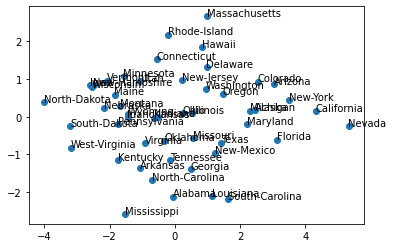

In [3]:
X_pca = pca.transform(Xnorm)

#print("X_pca", X_pca, X_pca[:,0], X_pca[:,1],)

plt.scatter(X_pca[:,0], X_pca[:,1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
#for label, x, y in zip(labels, X_)
